In [28]:
import cv2
import os
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
import sklearn.preprocessing
import sklearn.model_selection
import random
import time

## Load Data

In [35]:
data_path = "../training/weapon_classifier/"

categories = {
    file.name[:-4]: file
    for file in pathlib.Path(data_path).iterdir()
    if file.is_file() and file.name.endswith(".txt")
}

image_paths = {}
for k in categories:
    image_paths[k] = []
    with open(categories[k], "r") as f:
        for line in f:
            line = line.strip()
            if line != '':
                base_dir = "../training/unlabeled_frames"
                image_paths[k].append(os.path.join(base_dir, line))


                
images = []
labels = []
for label, image_paths in image_paths.items():
    for image_path in image_paths:
        image = cv2.imread(image_path) / 255
        image = image[200:400,300:500]
        images.append(image)
        labels.append(label)

seed = time.time()
random.seed(seed)
random.shuffle(images)
random.seed(seed)
random.shuffle(labels)

label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoder.fit(labels)
int_labels = label_encoder.transform(labels)


## Build Model

assault_rifle


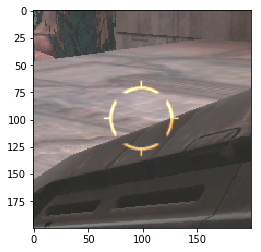

In [37]:

n = 54
plt.imshow(images[n])
print(labels[n])
plt.show()

In [38]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(200, 200, 3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32))

model.add(tf.keras.layers.Dense(len(categories.keys())))
model.add(tf.keras.layers.Activation("softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
model.fit(np.stack(images), int_labels, epochs=1, batch_size=100, validation_split=0.1)

Train on 387 samples, validate on 44 samples
Epoch 1/1
